In [ ]:
from networkx.generators.random_graphs import erdos_renyi_graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import random
import copy


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


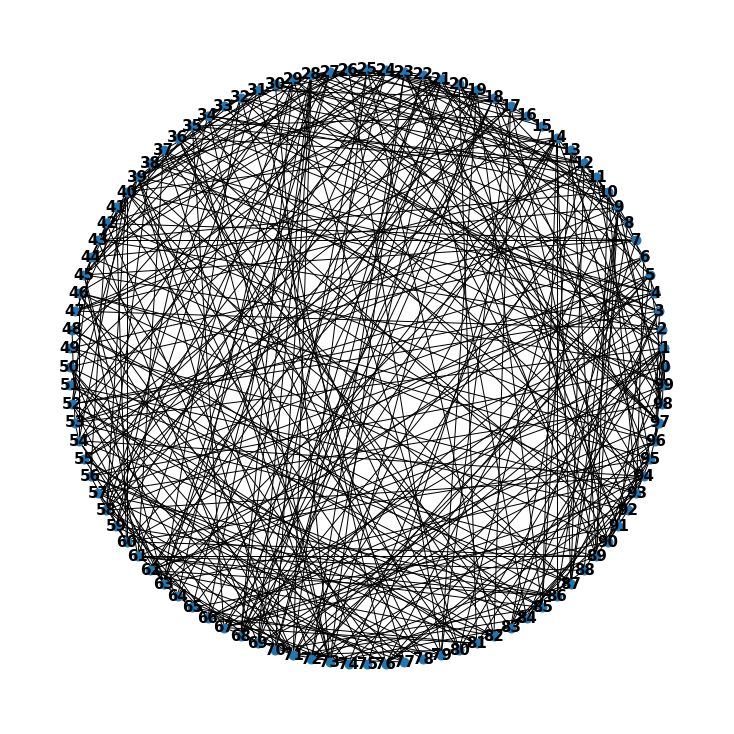

In [ ]:
#задаем рандомный граф с 100 вершинами 
n = 100
p = 0.08
G = erdos_renyi_graph(n, p)
print(G.nodes)

pos = nx.circular_layout(G)
plt.figure(figsize=(10, 10))
nx.draw(G,
        pos,
        node_size=80,
        labels=dict(zip(list(G.nodes()), list(G.nodes()))),
        with_labels=True,
        font_size=15,
       font_weight='bold')
plt.show()

In [ ]:
def random_choose_node(nodes, amount,color):
    new_list = sample(nodes,amount)
    leftover = list(set(nodes)-set(new_list))
    dict_colors = dict(zip(new_list,[color]*len(new_list)))
    return new_list,leftover,dict_colors


for i in G.nodes():
    G.nodes[i]['color'] = 'white'
G.nodes.data()

black,left,black_dict = random_choose_node(list(G.nodes()), 20,'black')
white,left,white_dict =random_choose_node(left, 20,'white')
np.sort(np.array(white))
np.sort(np.array(black))
np.array(left)
nx.set_node_attributes(G, white_dict, 'color')
nx.set_node_attributes(G, black_dict, 'color')
G.nodes.data()

NodeDataView({0: {'color': 'white'}, 1: {'color': 'white'}, 2: {'color': 'black'}, 3: {'color': 'white'}, 4: {'color': 'white'}, 5: {'color': 'white'}, 6: {'color': 'white'}, 7: {'color': 'white'}, 8: {'color': 'white'}, 9: {'color': 'white'}, 10: {'color': 'white'}, 11: {'color': 'white'}, 12: {'color': 'white'}, 13: {'color': 'white'}, 14: {'color': 'white'}, 15: {'color': 'black'}, 16: {'color': 'black'}, 17: {'color': 'white'}, 18: {'color': 'white'}, 19: {'color': 'black'}, 20: {'color': 'white'}, 21: {'color': 'white'}, 22: {'color': 'white'}, 23: {'color': 'white'}, 24: {'color': 'white'}, 25: {'color': 'white'}, 26: {'color': 'white'}, 27: {'color': 'white'}, 28: {'color': 'white'}, 29: {'color': 'white'}, 30: {'color': 'white'}, 31: {'color': 'black'}, 32: {'color': 'white'}, 33: {'color': 'white'}, 34: {'color': 'white'}, 35: {'color': 'white'}, 36: {'color': 'white'}, 37: {'color': 'black'}, 38: {'color': 'white'}, 39: {'color': 'white'}, 40: {'color': 'white'}, 41: {'color'

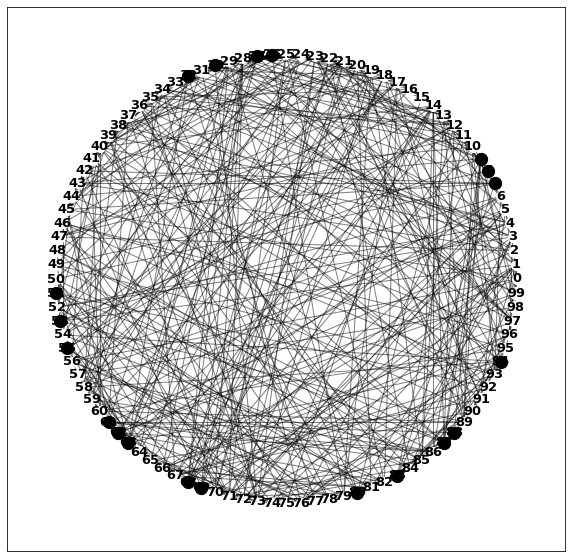

In [ ]:
pos = nx.circular_layout(G)
plt.figure(figsize=(10, 10))

nx.draw_networkx_nodes(G,
                       pos,
                       node_size=100,
                       nodelist=set(G.nodes) - set(black)-set(white),
                       node_color="white")
nx.draw_networkx_nodes(G,
                       pos,
                       node_size=150,
                       nodelist=white,
                       node_color="black")
nx.draw_networkx_nodes(G,
                       pos,
                       node_size=150,
                       nodelist=black,
                       node_color="white")

nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
nx.draw_networkx_labels(G,
                        pos,
                        labels=dict(zip(list(G.nodes()), list(G.nodes()))),
                        font_size=13,
                        font_weight='bold')
plt.show()

In [ ]:
neutral = copy.deepcopy(left)
white1 = copy.deepcopy(white)
black1= copy.deepcopy(black)
red_amount = [len(white1)]
green_amount = [len(black1)]

In [ ]:
def change_neutral_color(node, G, left, green, red):
    to_nodes = set(list(zip(*list(G.edges(node))))[1])
    print(f'nodes {to_nodes}')
    red_nodes = to_nodes & set(red)
    green_nodes = to_nodes & set(green)
    
    #если у нас нет цветных соседей, то цвет присваиваем рандомно
    if (len(red_nodes) + len(green_nodes) == 0):
        state = random.randint(1, 2)
        print('random:', state, '', node)
        return state
    
    #присваиваем красный цвет
    if (len(red_nodes) > len(green_nodes)):
        print(node, ' ', 1)
        return 1

     #присваиваем зеленый цвет
    if (len(red_nodes) <= len(green_nodes)):
        print(node, ' ', 2)
        return 2

new_red =[]
new_green=[]
for i in range(len(neutral)):
        
    state = change_neutral_color(neutral[i], G, left, black, white)
    if state == 1:
        print(G.nodes[i]['color'])
        print('white')
        white1.append(neutral[i])
        new_red.append(neutral[i])
    if state == 2:
        print(G.nodes[i]['color'])
        print('black')
        black1.append(neutral[i])
        new_green.append(neutral[i])
    if i == 15 or i==30 or i==45:
        red_amount.append(len(white1))
        green_amount.append(len(black1))
        

red_amount.append(len(white1))
green_amount.append(len(black1))        
G.nodes.data()
np.array(new_red)
np.array(new_green)
new_red = dict(zip(new_red,["white"]*len(new_red)))
new_green = dict(zip(new_green,["black"]*len(new_green)))
nx.set_node_attributes(G, new_red, 'color')
nx.set_node_attributes(G, new_green, 'color')
np.sort(np.array(white1))
np.sort(np.array(black1))
set(neutral)-set(white1)-set(black1)

ADADDAADDA 60
nodes {56, 45, 62}
0   2
red
black
nodes {32, 96, 66, 98, 99, 70, 71, 74, 76, 81, 20, 53, 90, 29}
1   2
green
black
nodes {96, 34, 35, 67, 40, 13, 80, 83, 52, 84}
3   2
black
black
nodes {38, 39, 8, 71, 52, 57, 58, 31}
4   2
red
black
nodes {99, 68, 72, 73, 22, 56, 91, 62}
5   2
green
black
nodes {72, 11, 18, 53, 60, 93, 63}
6   2
green
black
nodes {34, 99, 68, 43, 13, 24, 89, 27, 93}
10   2
red
black
nodes {34, 6, 71, 9, 12, 47, 83, 27, 95}
11   2
white
black
nodes {32, 35, 36, 11, 80, 54, 55, 87, 30, 63}
12   1
white
white
nodes {3, 10, 85, 94, 89, 28, 29, 30}
13   2
white
black
nodes {65, 98, 67, 68, 71, 8, 40, 74, 47, 85, 86, 55, 87}
14   2
red
black
nodes {90, 15, 79, 18, 82, 54, 25, 58, 27, 57}
17   2
red
black
nodes {89, 67, 68, 69, 6, 42, 17, 25, 95, 31}
18   2
red
black
nodes {64, 1, 66, 98, 81, 92}
20   2
red
black
nodes {97, 70, 40, 72, 46, 48, 52, 23, 57, 58, 91, 62}
21   2
red
black
nodes {69, 5, 70, 8, 9, 84, 91, 28}
22   2
black
black
nodes {72, 73, 43, 44,

set()

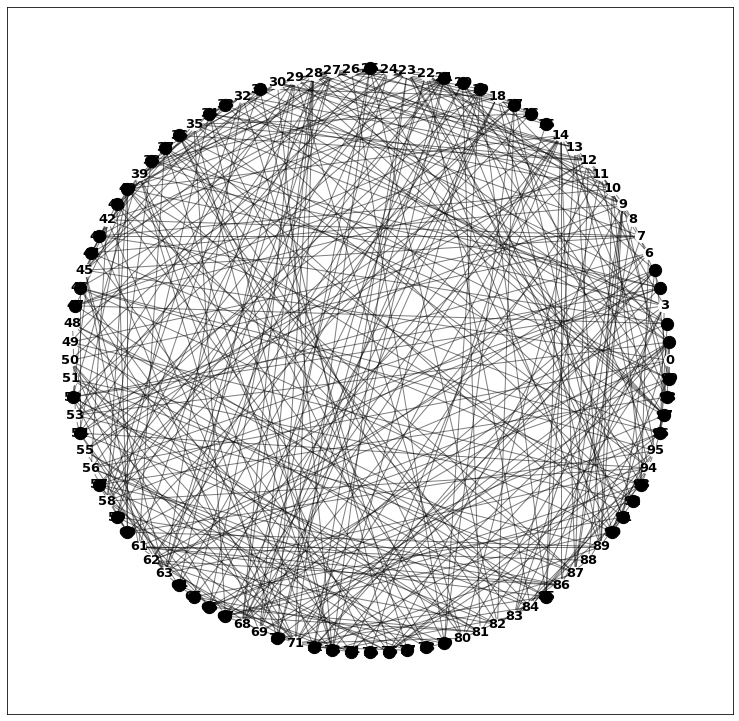

In [ ]:
x = [0,1,2,3,4]

pos = nx.circular_layout(G)
plt.figure(figsize=(13, 13))


nx.draw_networkx_nodes(G,
                       pos,
                       node_size=150,
                       nodelist=white1,
                       node_color="white")
nx.draw_networkx_nodes(G,
                       pos,
                       node_size=150,
                       nodelist=black1,
                       node_color="black")

nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
nx.draw_networkx_labels(G,
                        pos,
                        labels=dict(zip(list(G.nodes()), list(G.nodes()))),
                        font_size=13,
                        font_weight='bold')
plt.show()

In [ ]:
neutral = copy.deepcopy(left)
white1 = copy.deepcopy(white)
black1= copy.deepcopy(black)
red_amount = [len(white1)]
green_amount = [len(black1)]

In [ ]:
new_red =[]
new_green=[]
for i in range(len(neutral)):
        
    state = change_neutral_color(neutral[i], G, left, black, white)
    if state == 1:
        white1.append(neutral[i])
        new_red.append(neutral[i])
    if state == 2:
        black.append(neutral[i])
        new_green.append(neutral[i])
    if i == 15 or i==30 or i==45:
        red_amount.append(len(white1))
        green_amount.append(len(black))
        
red_amount.append(len(white1))
green_amount.append(len(black1))
np.array(new_red)
np.array(new_green)
new_red = dict(zip(new_red,["red"]*len(new_red)))
new_green = dict(zip(new_green,["green"]*len(new_green)))
nx.set_node_attributes(G, new_red, 'color')
nx.set_node_attributes(G, new_green, 'color')
set(neutral)-set(white1)-set(black1)

nodes {56, 45, 62}
0   1
nodes {32, 96, 66, 98, 99, 70, 71, 74, 76, 81, 20, 53, 90, 29}
1   2
nodes {96, 34, 35, 67, 40, 13, 80, 83, 52, 84}
3   1
nodes {38, 39, 8, 71, 52, 57, 58, 31}
4   2
nodes {99, 68, 72, 73, 22, 56, 91, 62}
5   2
nodes {72, 11, 18, 53, 60, 93, 63}
6   1
nodes {34, 99, 68, 43, 13, 24, 89, 27, 93}
10   1
nodes {34, 6, 71, 9, 12, 47, 83, 27, 95}
11   1
nodes {32, 35, 36, 11, 80, 54, 55, 87, 30, 63}
12   1
nodes {3, 10, 85, 94, 89, 28, 29, 30}
13   1
nodes {65, 98, 67, 68, 71, 8, 40, 74, 47, 85, 86, 55, 87}
14   1
nodes {90, 15, 79, 18, 82, 54, 25, 58, 27, 57}
17   2
nodes {89, 67, 68, 69, 6, 42, 17, 25, 95, 31}
18   2
nodes {64, 1, 66, 98, 81, 92}
20   2
nodes {97, 70, 40, 72, 46, 48, 52, 23, 57, 58, 91, 62}
21   2
nodes {69, 5, 70, 8, 9, 84, 91, 28}
22   1
nodes {72, 73, 43, 44, 93, 21, 56, 89, 26, 29, 94}
23   2
nodes {68, 39, 10, 50, 59, 63}
24   1
nodes {32, 69, 71, 40, 16, 17, 18, 19, 82, 53, 90, 29}
25   2
nodes {97, 2, 66, 68, 69, 70, 39, 71, 9, 13, 49, 22, 2

{1,
 4,
 5,
 17,
 18,
 20,
 21,
 23,
 25,
 29,
 33,
 34,
 36,
 38,
 39,
 40,
 42,
 43,
 45,
 46,
 47,
 48,
 52,
 56,
 58,
 59,
 60,
 66,
 67,
 70,
 71,
 72,
 73,
 74,
 76,
 79,
 81,
 82,
 84,
 85,
 86,
 89,
 93,
 95,
 96,
 97}

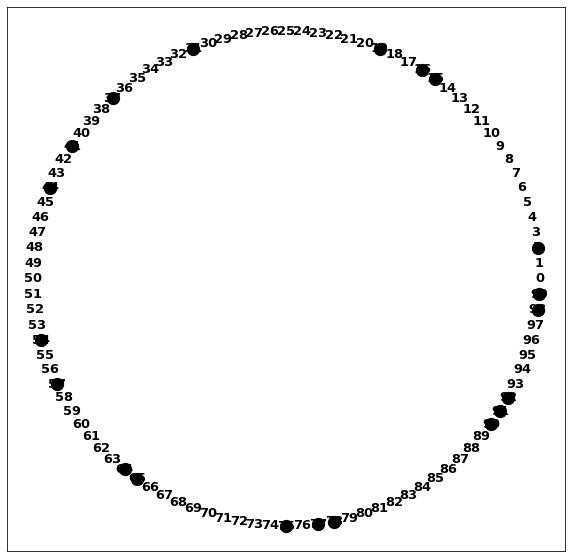

In [ ]:
x = [0,1,2,3,4,5]

pos = nx.circular_layout(G)
plt.figure(figsize=(10, 10))


nx.draw_networkx_nodes(G,
                       pos,
                       node_size=150,
                       nodelist=white1,
                       node_color="white")
nx.draw_networkx_nodes(G,
                       pos,
                       node_size=150,
                       nodelist=black1,
                       node_color="black")

# nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
nx.draw_networkx_labels(G,
                        pos,
                        labels=dict(zip(list(G.nodes()), list(G.nodes()))),
                        font_size=13,
                        font_weight='bold')
plt.show()